# The NY Taxis' dataset


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = sns.load_dataset("taxis")
data

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


### Understanding the dataset

#### Provide a description of each column:

- `pickup`: date & time of the customer's pickup from the taxi (dtype: object)
- `dropoff`: date & time of the customer's dropoff from the taxi (dtype: object)
- `passengers`: the number of the passeger's for the taxi route (dtype: integer)
- `distance`: the distance of the taxi route in km (dtype: float)
- `fare`: the cost of the taxi route in dollars, (assuming the data come from USA) (dtype: float) 
- `tip`: the tip of the driver for the route in dollars (dtype: float)
- `tolls`: cost for passing roads-bridges etc. (dtype: float)
- `total`: total dollars payed for the taxi. (dtype: float) 
- `color`: the color of the taxi vehicle . (dtype: object)
- `payment`: how the customer payed the taxi. (dtype: object)
- `pickup_zone`: the area-neighborhood that the customer got into the taxi. (dtype: object)
- `dropoff_zone`: the area-neighborhood of the customer's destination. (dtype: object)
- `pickup_borough`: the town that the customer got into the taxi. (dtype: object)
- `dropoff_borough`: the town of the customer's destination. (dtype: object)

#### For the numerical colums find the `min` and `max`

In [163]:
minimum = data.min(axis = 0 , numeric_only = True)
maximum = data.max(numeric_only = True)
print(f" The minimum values for the dataset are :  \n {minimum} \n \n The maximum values are: \n {maximum}.")

 The minimum values for the dataset are :  
 passengers    0.0
distance      0.0
fare          1.0
tip           0.0
tolls         0.0
total         1.3
dtype: float64 
 
 The maximum values are: 
 passengers      6.00
distance       36.70
fare          150.00
tip            33.20
tolls          24.02
total         174.82
dtype: float64.


#### Find the unique values for `passengers`, `color`, `payment`, `pickup_borough`, `dropoff_borough`

In [164]:
# Provide code
for i in ["passengers","color","payment","pickup_borough","dropoff_borough"]:
    print(f" The unique values for {i} column is  {data[i].unique()} ")

 The unique values for passengers column is  [1 3 0 6 5 2 4] 
 The unique values for color column is  ['yellow' 'green'] 
 The unique values for payment column is  ['credit card' 'cash' nan] 
 The unique values for pickup_borough column is  ['Manhattan' 'Queens' nan 'Bronx' 'Brooklyn'] 
 The unique values for dropoff_borough column is  ['Manhattan' 'Queens' 'Brooklyn' nan 'Bronx' 'Staten Island'] 


#### Find the first and last date of the datasets entries

In [165]:
# Provide code
sort_data_pickup = data.sort_values('pickup')
sort_data_dropoff = data.sort_values('dropoff')
first_date = sort_data_pickup['pickup'].head(1).values[0]
last_date = sort_data_dropoff['dropoff'].tail(1).values[0]
print(f"The first recorded date is {first_date} and the last recorded date is {last_date}")

The first recorded date is 2019-02-28 23:29:03 and the last recorded date is 2019-04-01 00:13:58


#### Create a new column named `cost` taking the difference between `total` and `tip`

In [166]:
# Provide code
data["cost"] = data["total"] - data["tip"]

#### Create a new column named `duration` taking the difference between `dropoff` and `pickup`

In [167]:
# Provide code
data["duration(min)"] = (pd.to_datetime(data["dropoff"]) - pd.to_datetime(data["pickup"])).dt.total_seconds()/60

#### Find rows with incomplete information or wrong entries, e.g. `'distance'==0`, `nan` values, etc. Remove them from the dataset
** Extra cleaning will be made after visualization

In [168]:
#We keep only the entries where passerger number is positive and less than 5, and distance == 0
mask = (data["passengers"] > 0)*(data["passengers"] < 5) * (data["distance"] != 0)
data = data[mask]
#remove rows with nan values
data = data.dropna()
#remove entries in which duration is less than 2 minutes. Although they must me instances that a customer left the ride that early, this entries will be outliers for our analysis
mask = (data["duration(min)"] > 2)
data = data[mask]

#after visualization we saw that we have outlier for values of fare = 52.
mask = (data["fare"] != 52)
data = data[mask]

### Statistical analysis

#### Find the frequency of the unique values for `passengers`, `color`, `payment`, `pickup_borough`, `dropoff_borough`

In [169]:
for i in ['passengers', 'color', 'payment', 'pickup_borough', 'dropoff_borough']:
    print(data[i].value_counts())

1    4429
2     825
3     229
4     105
Name: passengers, dtype: int64
yellow    4692
green      896
Name: color, dtype: int64
credit card    4006
cash           1582
Name: payment, dtype: int64
Manhattan    4663
Queens        485
Brooklyn      350
Bronx          90
Name: pickup_borough, dtype: int64
Manhattan        4585
Brooklyn          451
Queens            423
Bronx             127
Staten Island       2
Name: dropoff_borough, dtype: int64


#### What is the percentage of people giving a `tip`

In [170]:
tip = 1 - data['tip'].value_counts(normalize= True)[0]
print(f"The tip percentage is {tip}%")

The tip percentage is 0.6426270579813886%


#### Find the proportion between the `cost` and the `tip`

In [171]:
data["cost/tip"] = data['cost']/data['tip']
data.replace([np.inf], 0, inplace=True)

#### Find the proportion between `distance` and `duration`

In [172]:
data["distance/duration (km/h)"] = data['distance']*60/ data['duration(min)']

#### Find the proportion between the `cost` and the `fare`

In [173]:
data["cost/fare"] = data['cost']/data['fare']

#### Find the proportion between `fare` and `total`

In [174]:
data["fare/total"] = data['fare']/data['total']

### Visualization

#### Use the function `sns.pairplot` to visualize cross correlation

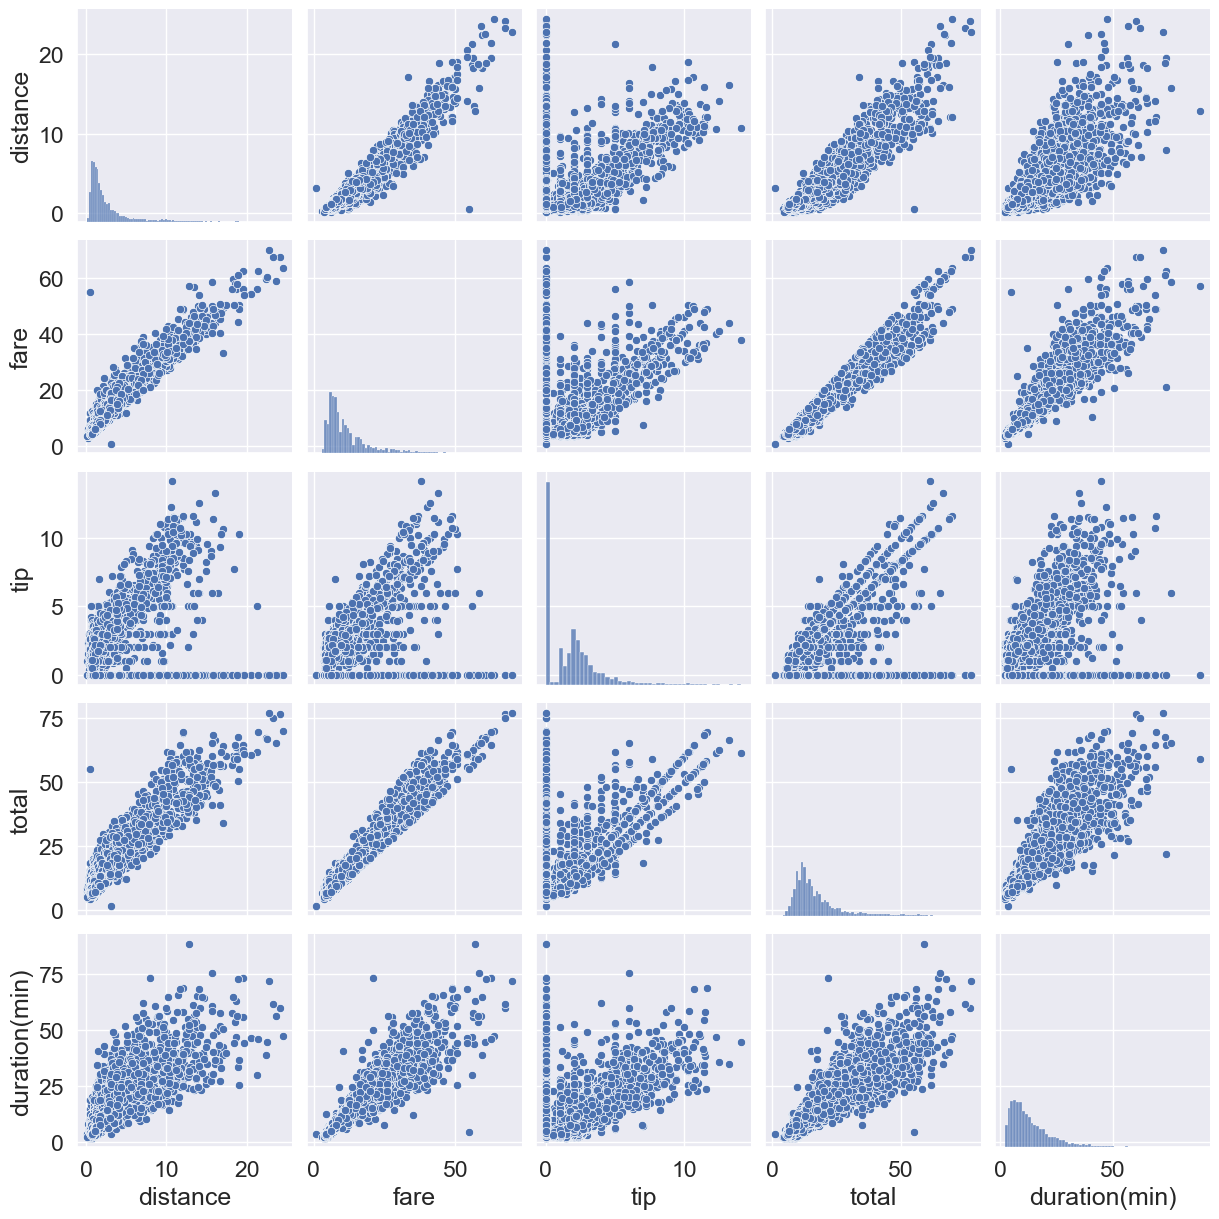

In [207]:
selected = data[[ "distance", "fare", "tip", "total", "duration(min)"]]
sns.set(font_scale=1.5)
sns.pairplot(selected)
plt.savefig("cross_correlation.png", dpi=300, transparent=False)
plt.show()


#### Where is there correlation?

* distance - fare, duration
* total - distance , duration
* fare - total
* tip - distance (no zero values)

#### Display the normalized distribution (histogram, probability) of tips for different borough

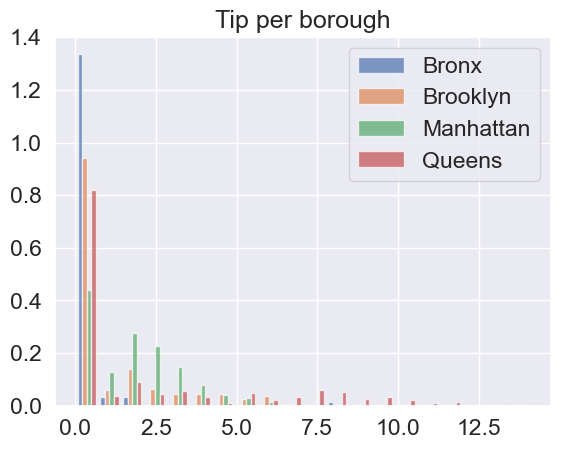

In [240]:
keys = []
vals = []
for key, values in data.groupby("pickup_borough"):
    keys.append(key)
    vals.append(values["tip"])
plt.hist(vals, density=True, bins=20, alpha=0.7, label=keys)
plt.title("Tip per borough")
plt.legend()
plt.savefig("tip-borough.png", dpi=300, transparent=False)
plt.show()


### Additional code

Provide here after code for any additional statistical information / plots you include in the report


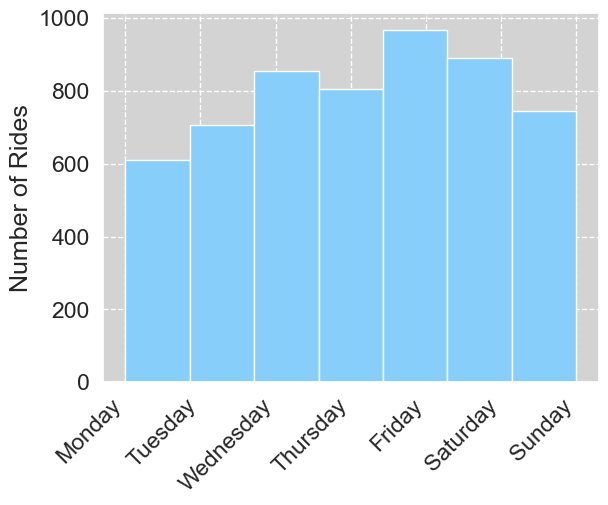

In [247]:
data["pickup"] = pd.to_datetime(data["pickup"])
data["pickup_day"] = data["pickup"].dt.strftime('%A')
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = data["pickup_day"].value_counts().reindex(days)
plt.hist(day_counts.index, weights=day_counts.values, bins=len(day_counts), histtype='bar' , color='lightskyblue')
plt.grid(True, linestyle='--')
plt.gca().set_facecolor('lightgray')

plt.xlabel("")
plt.ylabel("Number of Rides")
#plt.title("Number of Rides per Day of the Week")

# set the x-axis ticks and labels
plt.xticks(range(len(day_counts)), day_counts.index, rotation=45, ha='right')
plt.savefig("days", dpi=300, transparent=False, bbox_inches='tight')
plt.show()


#### Visualize data in order to find outliers (Not fully-spanning histogram are sign of outliers)

In [210]:
#data.hist("distance")
#plt.show()

In [211]:
mask = (data["distance"] < 25)
data = data[mask]

In [244]:
#data.hist("fare",bins = 50)
#plt.show()

In [213]:
mask = (data["fare"] < 80)
data = data[mask]

In [214]:
#data.hist("tip")
#plt.show()

In [215]:
#data.hist("tolls")
#plt.show()

In [216]:
mask = (data["tolls"] < 10)
data = data[mask]

In [217]:
#data.hist("total")
#plt.show()

#### Find the tip-density for each borough for the passenger that gave a tip

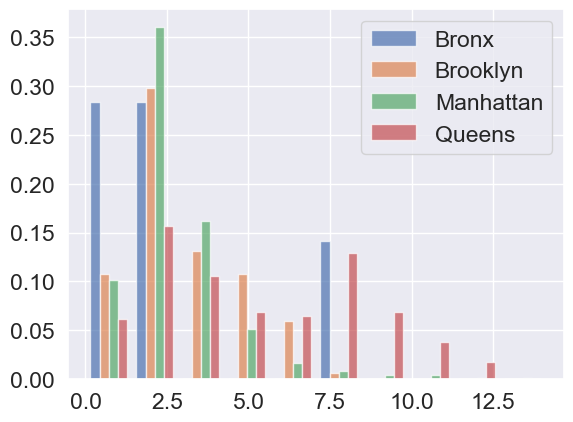

In [249]:
mask = (data["tip"] != 0)
data_tip = data[mask]
keys = []
vals = []
for key, values in data_tip.groupby("pickup_borough"):
    keys.append(key)
    vals.append(values["tip"])
plt.hist(vals, density=True, bins=10, alpha=0.7, label=keys)
#plt.title("Tip per borough for the passengers that tipped")
plt.legend()
plt.savefig("tip-borough-tip.png", dpi=300, transparent=False)
plt.show()

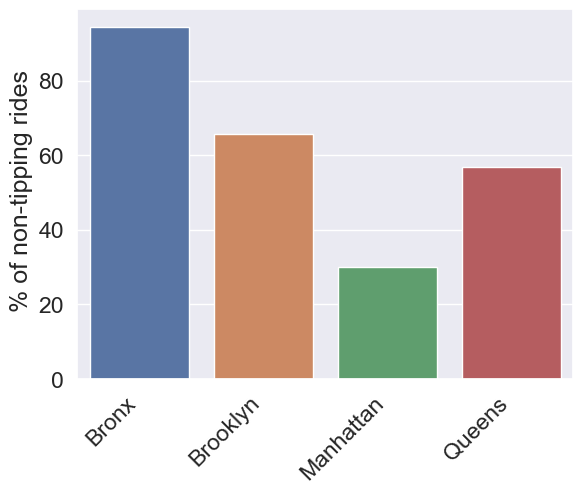

In [252]:
tip_data = data[data["tip"] == 0]
total_data = data.groupby("pickup_borough").size()
non_tip_data = tip_data.groupby("pickup_borough").size()
non_tip_percentage = non_tip_data/total_data * 100
sns.barplot(x=non_tip_percentage.index, y=non_tip_percentage.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel(" % of non-tipping rides")
#plt.title("Percentage of Non-tipping Rides per Borough")
plt.savefig("tip-borough-notip.png", dpi=300, bbox_inches='tight')
plt.show()

#### We want to see if the passengers tip more for faster taxi drivers

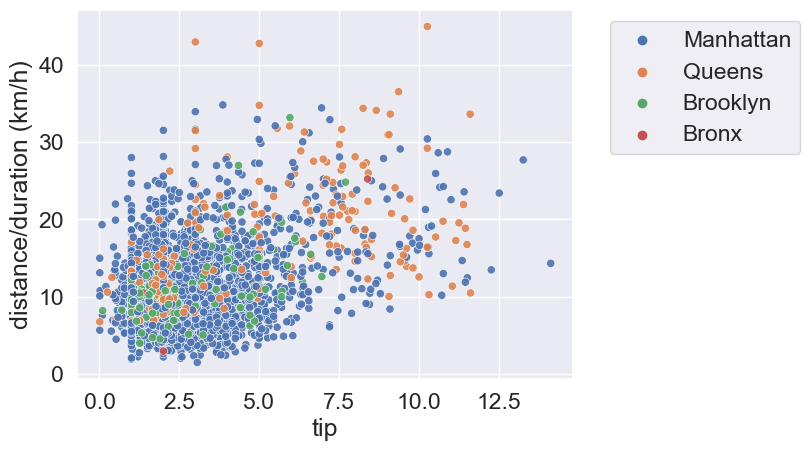

In [255]:
#first we clean the outliers
mask = (data['distance/duration (km/h)'] < 100 )
data = data[mask]
mask = (data["tip"] != 0)
data_tip = data[mask]
sns.scatterplot(x="tip", y="distance/duration (km/h)", hue="pickup_borough", data=data_tip, alpha = 0.9)
plt.legend(bbox_to_anchor=(1.05, 1))
#plt.title("Tip amount per speed of the ride per borough")
plt.savefig("tip-per-speed", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [222]:
data["distance/duration (km/h)"].describe()

count    5577.000000
mean       11.062786
std         5.289516
min         1.222930
25%         7.549393
50%         9.911504
75%        13.236534
max        54.174757
Name: distance/duration (km/h), dtype: float64

#### Let's see if the colour of the taxi can effect the tip

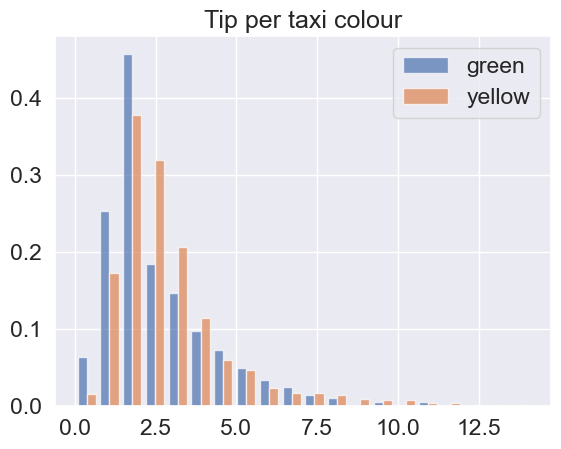

In [223]:
mask = (data["tip"] != 0)
data_tip = data[mask]
keys = []
vals = []
for key, values in data_tip.groupby("color"):
    keys.append(key)
    vals.append(values["tip"])
plt.hist(vals, density=True, bins=20, alpha=0.7, label=keys)
plt.title("Tip per taxi colour")
plt.legend()
plt.show()

In [224]:
#percentage of the non tipers
mask = (data["tip"] == 0)
data_zero_tip = data[mask]
print("yellow non-tippers percentage = ",data_zero_tip['color'].value_counts()[0]/data['color'].value_counts()[0])
print("green non-tippers percentage = ",data_zero_tip['color'].value_counts()[1]/data['color'].value_counts()[1])

yellow non-tippers percentage =  0.29656496692980583
green non-tippers percentage =  0.6730337078651686


In [225]:
#Statistical analysis for color
from scipy.stats import sem
mask = (data["tip"] != 0)*(data['color'] == 'green')
data_zero_col = data[mask]
col_taxi_tip_sem = sem(data_zero_col["tip"])
mean = data_zero_col["tip"].describe()[1]
print(f"The mean value for green taxi tip is {mean:.2f} +/- {col_taxi_tip_sem:.2f}")

The mean value for green taxi tip is 2.58 +/- 0.10


In [226]:
mask = (data["tip"] != 0)*(data['color'] == 'yellow')
data_zero_col = data[mask]
col_taxi_tip_sem = sem(data_zero_col["tip"])
mean = data_zero_col["tip"].describe()[1]
print(f"The mean value for yellow taxi tip is {mean:.2f} +/- {col_taxi_tip_sem:.2f}")

The mean value for yellow taxi tip is 2.88 +/- 0.03


In [228]:
data.corr()

,passengers,distance,fare,tip,tolls,total,cost,duration(min),cost/tip,distance/duration (km/h),cost/fare,fare/total,pickup_hour
passengers,1.000000,-0.019241,-0.012639,0.025462,-0.007488,0.003837,-0.001256,-0.012043,-0.014316,-0.017603,0.060751,-0.064690,0.039238
distance,-0.019241,1.000000,0.961306,0.352679,0.551571,0.927634,0.952626,0.809454,-0.007598,0.625869,-0.538780,0.499847,-0.041219
fare,-0.012639,0.961306,1.000000,0.375408,0.509730,0.963755,0.987773,0.917845,-0.003267,0.460598,-0.606227,0.546924,-0.034677
tip,0.025462,0.352679,0.375408,1.000000,0.310739,0.577375,0.423971,0.331302,-0.001329,0.207512,-0.144276,-0.273975,0.032468
tolls,-0.007488,0.551571,0.509730,0.310739,1.000000,0.595416,0.593193,0.377965,-0.007560,0.364053,-0.094726,0.062538,0.000859
total,0.003837,0.927634,0.963755,0.577375,0.595416,1.000000,0.984255,0.875222,-0.002653,0.454574,-0.496608,0.350278,-0.006492
cost,-0.001256,0.952626,0.987773,0.423971,0.593193,0.984255,1.000000,0.899116,-0.002655,0.459313,-0.519627,0.447854,-0.014229
duration(min),-0.012043,0.809454,0.917845,0.331302,0.377965,0.875222,0.899116,1.000000,0.001382,0.165568,-0.635744,0.565357,-0.016076
cost/tip,-0.014316,-0.007598,-0.003267,-0.001329,-0.007560,-0.002653,-0.002655,0.001382,1.000000,-0.006321,-0.012317,0.007523,-0.000266
distance/duration (km/h),-0.017603,0.625869,0.460598,0.207512,0.364053,0.454574,0.459313,0.165568,-0.006321,1.000000,-0.231465,0.223212,-0.094346


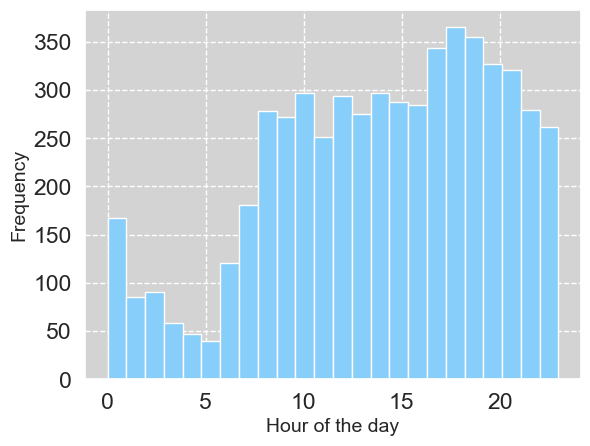

In [257]:
data["pickup"] = pd.to_datetime(data["pickup"])
data["pickup_hour"] = data["pickup"].dt.hour
plt.hist(data["pickup_hour"], bins=24, color='lightskyblue')
plt.grid(True, linestyle='--')
plt.gca().set_facecolor('lightgray')
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
#plt.title("Frequency of pickups by hour of the day", fontsize=14)
plt.savefig("Rides-hour", dpi=300, bbox_inches='tight')
plt.show()
